# Week 3

---

# How similar is COVID-19 to Other Coronaviruses?

Consider the following coronavirus genomes:

1. SARS coronavirus

2. Bat SARS-like coronavirus isolate

3. COVID-19

This notebook will continue comparing these 3 coronavirus strands as a follow up to the Trimer Composition.

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO,AlignIO,Seq

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(40,20),'axes.titlesize':46, 'axes.labelsize':32, 'xtick.labelsize': 24, 'ytick.labelsize': 24})

---

## Comparing GC content

GC content (guanine-cytosine content) is the proportion of nucleotides:
$$
\mbox{GC content} = (G_{count} + C_{count}) / (\mbox{Total Nucleotides}) * 100
$$

In [6]:
def get_gc_comp(seq):
    total_nucleotides = len(seq)
    G_count,C_count = seq.count('G'),seq.count('C')
    return (G_count + C_count) / total_nucleotides * 100

### SARS

Using a single complete genome (ZJ0301)

In [3]:
sars_seq_file = './data/SARSsequence.fasta'

sars_seq = list(SeqIO.parse(sars_seq_file,"fasta"))[0]
print(sars_seq)

ID: DQ182595
Name: DQ182595
Description: DQ182595 |SARS coronavirus ZJ0301 from China| complete genome
Number of features: 0
Seq('TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGA...AGA', SingleLetterAlphabet())


In [7]:
sars_gc = get_gc_comp(sars_seq.seq)
print(sars_gc)

40.80320473978321


### Bat SARS-like Coronavirus Isolate (bat-SL-CoVZC45)

Using a single complete genome

In [8]:
bat_seq_file = './data/bat-SL-CoVZC45sequence.fasta'

bat_seq = list(SeqIO.parse(bat_seq_file,"fasta"))[0]
print(bat_seq)

ID: MG772933.1
Name: MG772933.1
Description: MG772933.1 Bat SARS-like coronavirus isolate bat-SL-CoVZC45, complete genome
Number of features: 0
Seq('ATATTAGGTTTTTACCTTCCCAGGTAACAAACCAACTAACTCTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [9]:
bat_gc = get_gc_comp(bat_seq.seq)
print(bat_gc)

38.90342930004698


### COVID-19

Using complete genome of reference sequence NC_045512

In [10]:
cov_seq_file = './data/COVID19refsequence.fasta'

cov_seq = list(SeqIO.parse(cov_seq_file,"fasta"))[0]
print(cov_seq)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [12]:
cov_gc = get_gc_comp(cov_seq.seq)
print(cov_gc)

37.97277865097147


---

It looks like COVID-19 is very similar to the bat coronavirus (less than 1% difference), but comparing all 3 to other diseases might help solidify the similarities in GC content.

###

In [16]:
# TB
tb_seq_file = './data/TBsequence.fasta'

tb_seq = list(SeqIO.parse(tb_seq_file,"fasta"))[0]
print(tb_seq)
tb_gc = get_gc_comp(tb_seq.seq)
print(tb_gc,'\n')

# Chicken pox virus
hhv_seq_file = './data/HHV3sequence.fasta'

hhv_seq = list(SeqIO.parse(hhv_seq_file,"fasta"))[0]
print(hhv_seq)
hhv_gc = get_gc_comp(hhv_seq.seq)
print(hhv_gc)

ID: AL123456.3
Name: AL123456.3
Description: AL123456.3 Mycobacterium tuberculosis H37Rv complete genome
Number of features: 0
Seq('TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGGTCGTCTCC...TCG', SingleLetterAlphabet())
65.61466628826449 

ID: NC_001348.1
Name: NC_001348.1
Description: NC_001348.1 Human herpesvirus 3, complete genome
Number of features: 0
Seq('AGGCCAGCCCTCTCGCGGCCCCCTCGAGAGAGAAAAAAAAAAGCGACCCCACCT...AGG', SingleLetterAlphabet())
46.02030684475193


Now time to look at the GC content side by side via Bar Graph

In [30]:
df = pd.DataFrame([cov_gc,bat_gc,sars_gc,hhv_gc,tb_gc],index=['COVID-19','bat-SL-CoVZC45','SARS','Varicella (chicken pox)','Tuberculosis']).T
df

,COVID-19,bat-SL-CoVZC45,SARS,Varicella (chicken pox),Tuberculosis
0,37.972779,38.903429,40.803205,46.020307,65.614666


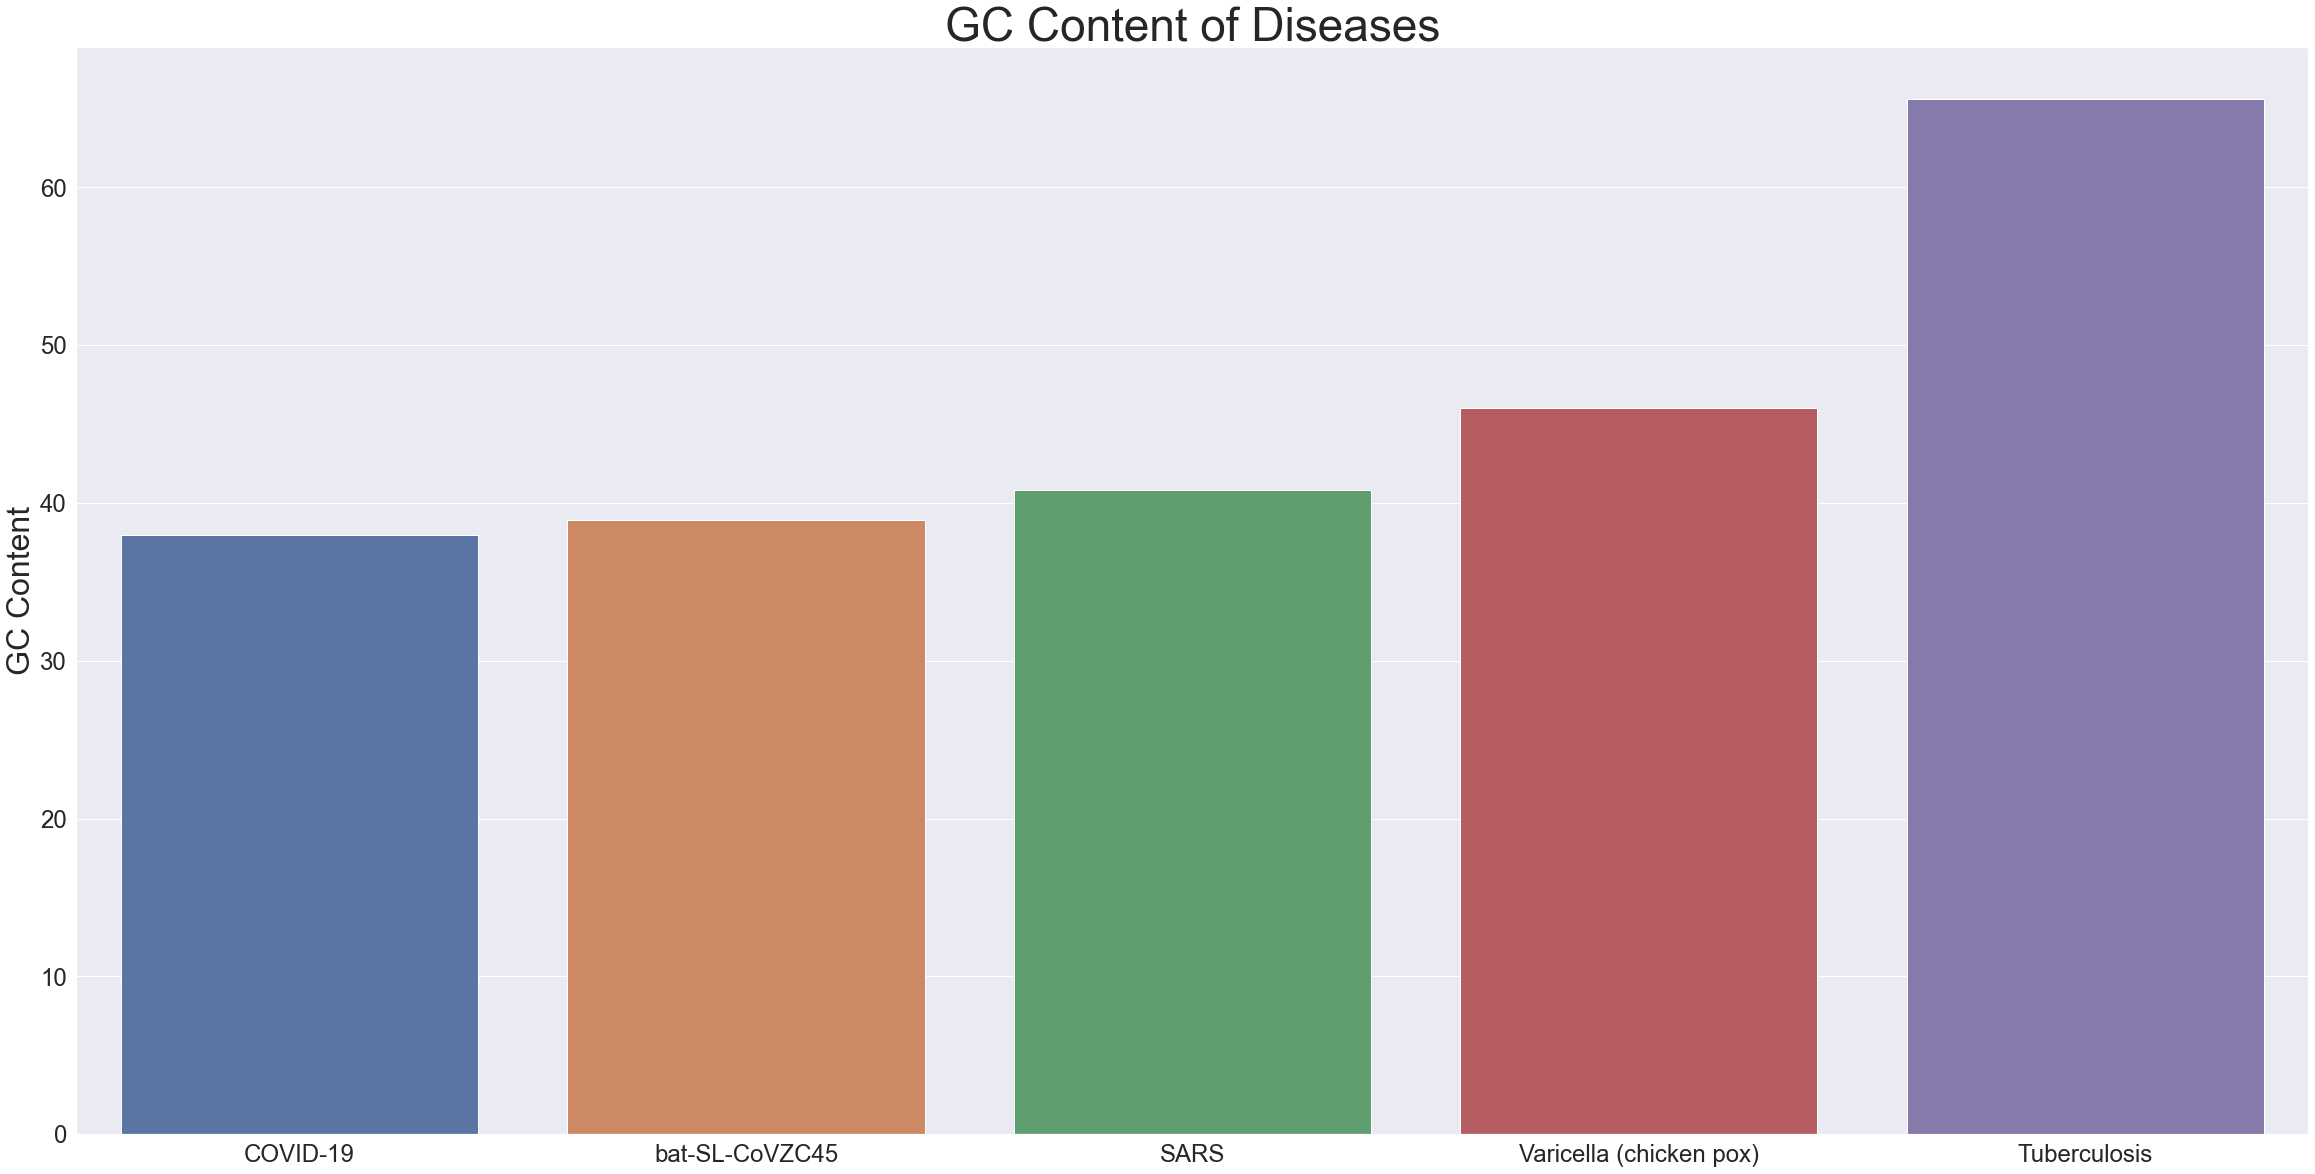

In [33]:
bar_plt = sns.barplot(data=df)
bar_plt.set(ylabel='GC Content',title='GC Content of Diseases');

The progression of similarity between the different diseases is apparent. The viruses are all much closer in similarity than the bacterial disease, the coronavirus strands are even more similar than the other virus, and COVID-19/bat-SL-CoVZC45 are even closer related in terms of GC content.

This shows more evidence about the findings that COVID-19 could have evolved from this bat coronavirus.

---

##